In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

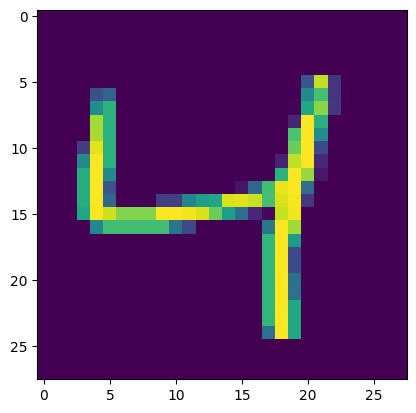

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.9135 - val_loss: 0.1664 - val_accuracy: 0.9504
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1269 - accuracy: 0.9618 - val_loss: 0.1123 - val_accuracy: 0.9672
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0883 - accuracy: 0.9729 - val_loss: 0.1040 - val_accuracy: 0.9707
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0656 - accuracy: 0.9800 - val_loss: 0.0951 - val_accuracy: 0.9712
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0947 - val_accuracy: 0.9736
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0992 - val_accuracy: 0.9733
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.1009 - val_accuracy:

In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 963us/step


In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9765

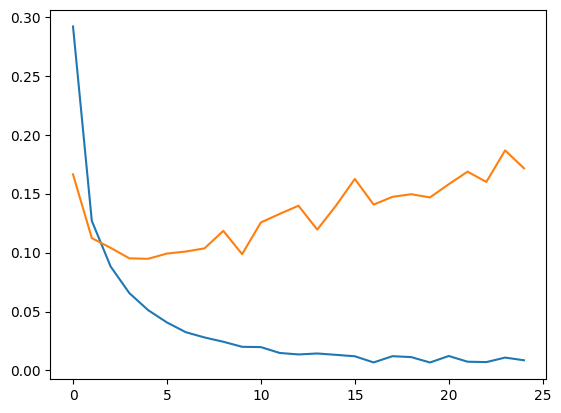

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

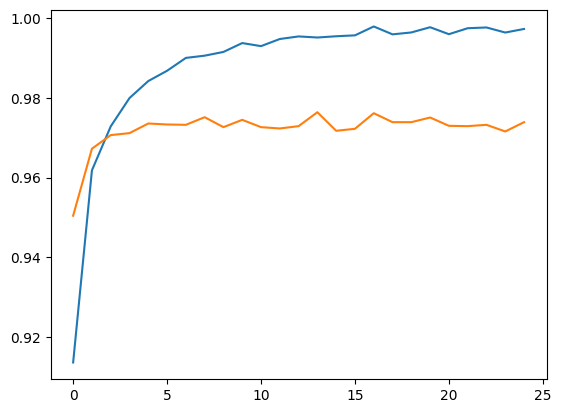

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

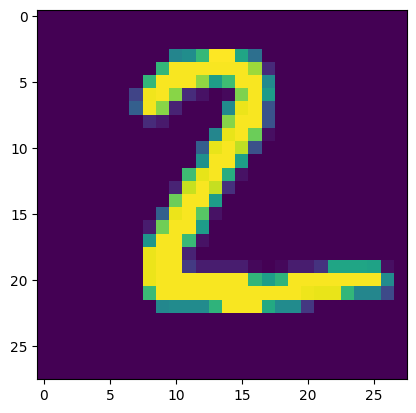

In [17]:
plt.imshow(X_test[1])

In [18]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 14ms/step


array([2])

In [19]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 990us/step


array([3.7128263e-24, 2.7902319e-19, 1.6611587e-14, 7.3659464e-12,
       4.0024874e-32, 3.3517794e-23, 9.4766248e-31, 9.9999994e-01,
       1.8299467e-21, 7.3434809e-14], dtype=float32)

In [21]:
import numpy as np
np.argmax(y_predicted[0])

7

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [23]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    0,    1,    1,    0,    1,    3,    2,    2],
       [   0, 1129,    1,    0,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1003,    1,    3,    0,    3,   10,    5,    0],
       [   0,    3,    5,  981,    0,    2,    0,    7,    6,    6],
       [   2,    1,    3,    0,  942,    1,    4,   12,    3,   14],
       [   3,    0,    0,   12,    1,  870,    2,    0,    3,    1],
       [   3,    3,    3,    1,    7,    6,  932,    0,    3,    0],
       [   0,    4,    7,    1,    0,    0,    0, 1011,    2,    3],
       [   1,    0,    3,    4,    2,    3,    1,    5,  954,    1],
       [   2,    8,    0,    3,    2,    8,    0,    9,    3,  974]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

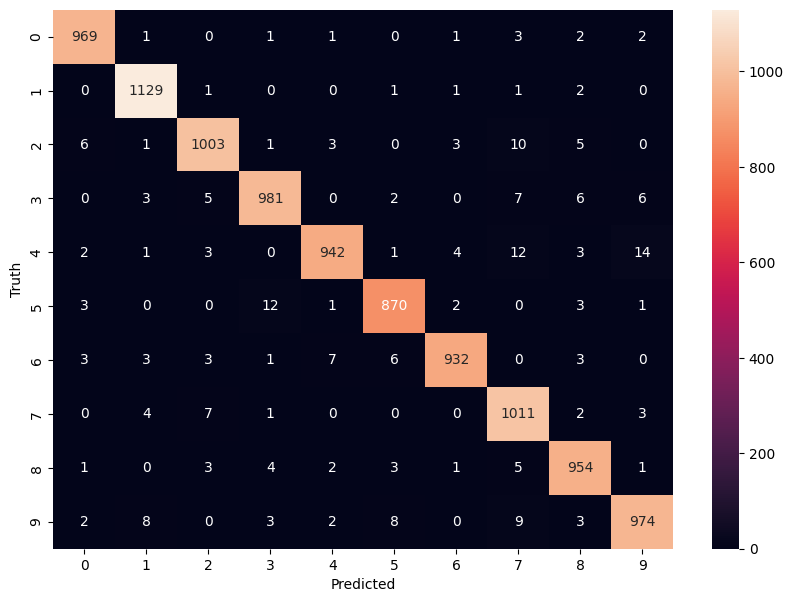

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')